In [3]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn
from matplotlib import pyplot as plt
global food_df
plt.close('all')

In [6]:
food_df = pd.read_csv('C:/Users/XE/en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False, decimal=".")
food_df.columns = food_df.columns.str.replace('-','_')
#food_df.drop(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
#              'generic_name', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins_tags',
#             'manufacturing_places_tags', 'labels_tags', 'labels', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
#              'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'allergens',
#              'traces', 'traces_tags', 'no_nutriments', 'additives', 'additives_tags', 'ingredients_from_palm_oil_tags', 
#              'ingredients_that_may_be_from_palm_oil_tags', 'states', 'states_tags', 'image_url', 'image_small_url'])


In [7]:
def del_nulls(data, columns=None):
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

def split_row(df, column, sep):
    indexes = list()
    new_values = list()
    for i, raw_column in enumerate(df[column].astype(str)):
        values = raw_column.split(sep) #splitting values by separator
        for value in values: #writing new values and theit indexes in list
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy() #creating new dataframe with splitted values
    new_df[column] = new_values
    return new_df

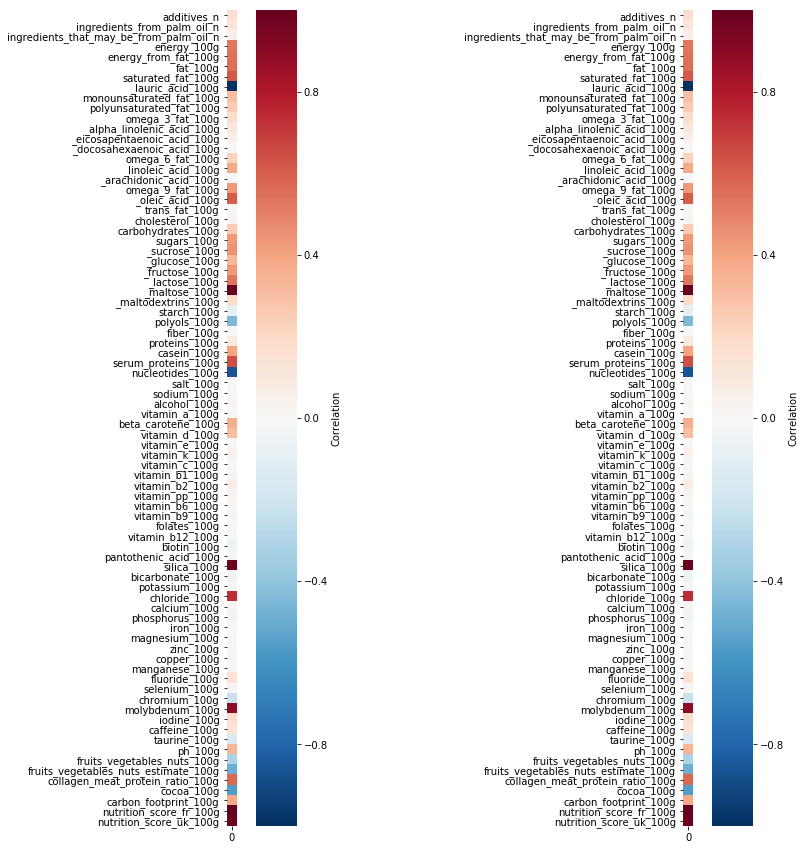

In [71]:
ns_uk = food_df.corrwith(food_df['nutrition_score_uk_100g'])
ns_uk= ns_uk.dropna()
fig, ax = plt.subplots(1,2, figsize=(15,15))
seaborn.heatmap(a.to_frame(),square=True, cbar_kws={'label': 'Correlation'}, ax=ax[0], cmap = "RdBu_r")
ns_fr = food_df.corrwith(food_df['nutrition_score_fr_100g'])
ns_fr = a.dropna() 
seaborn.heatmap(a.to_frame(),square=True, cbar_kws={'label': 'Correlation'}, ax=ax[1], cmap="RdBu_r")
plt.show()


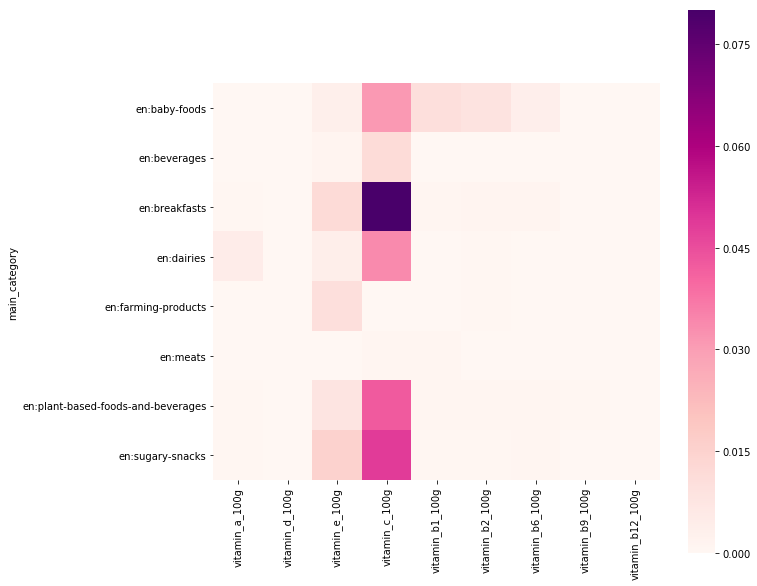

In [9]:
a = del_nulls(food_df[['main_category', 'vitamin_a_100g',  'vitamin_d_100g','vitamin_e_100g', 'vitamin_c_100g',
'vitamin_b1_100g', 'vitamin_b2_100g','vitamin_b6_100g', 'vitamin_b9_100g', 'vitamin_b12_100g']])
a = a.loc[(a["main_category"].str.contains("en:"))]
a = a.groupby("main_category").mean()
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(a, square=True, cmap="RdPu")
#seaborn.heatmap(a.drop(["en:dietary-supplements"]), square=True, cmap="RdPu")

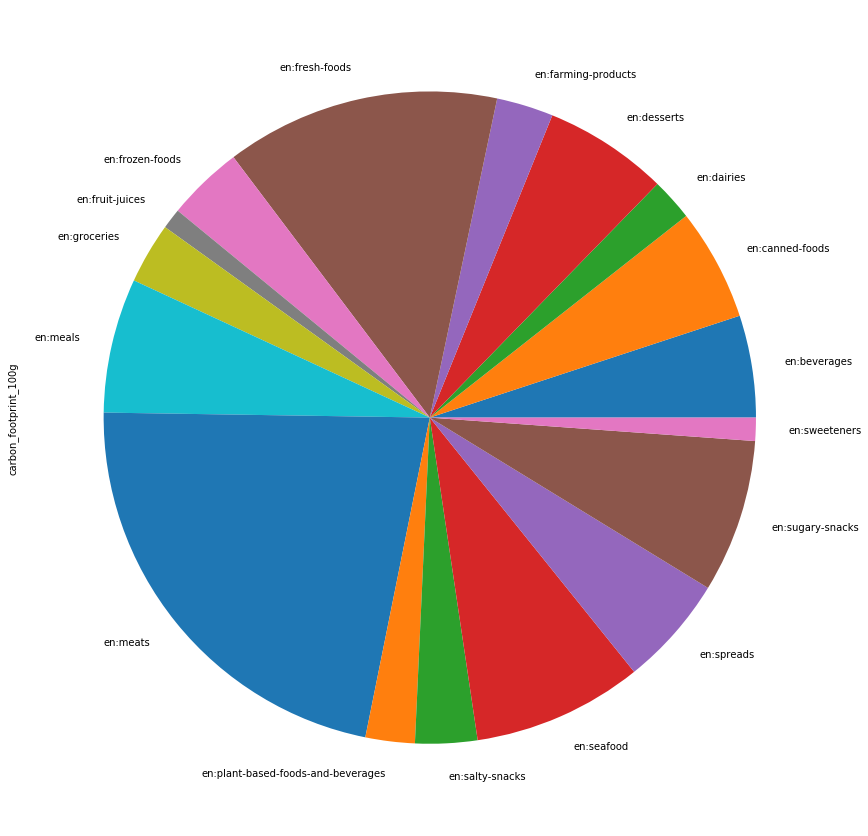

In [32]:
food_cat = del_nulls(food_df, ["main_category"])
cat = food_cat["main_category"].value_counts()
a = splitDataFrameList(del_nulls(food_df[["main_category","carbon_footprint_100g"]]), "main_category", ",")
a = a[a["main_category"].isin(cat[:20].index)].groupby("main_category").mean()
plot = a.plot.pie(y='carbon_footprint_100g', figsize=(15, 15), legend = False)

Jews   NaN
dtype: float64

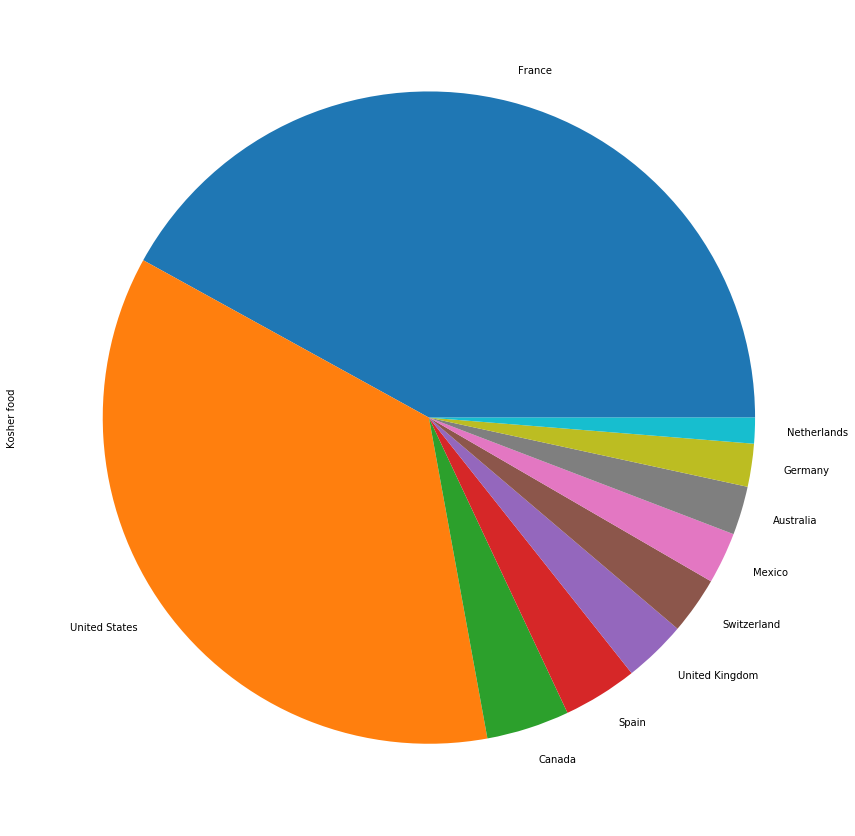

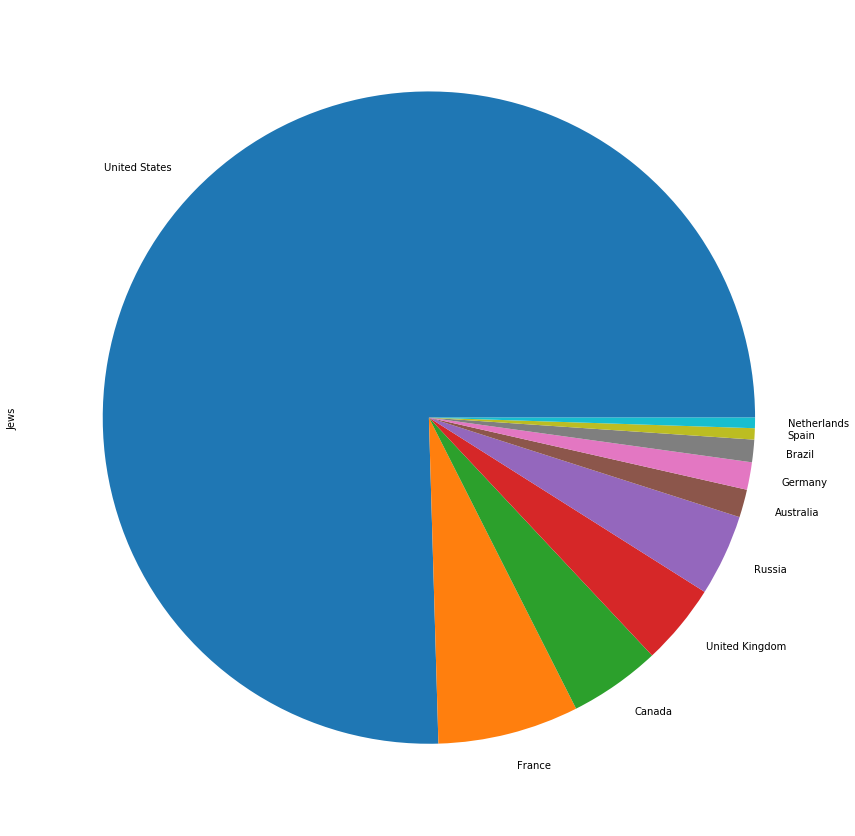

In [59]:
labels_df = splitDataFrameList(del_nulls(food_df[["countries_en", "labels_en"]]), "countries_en", ",")
kosher_food = labels_df.loc[(labels_df["labels_en"].str.contains("Kosher"))]
kosher_food = kosher_food["countries_en"].value_counts()
kosher_food = kosher_food.dropna().sort_values(ascending=False)
fig, ax1 = plt.subplots(figsize=(15,15))
kosher_food[:10].plot.pie(ax = ax1)
ax1.set_ylabel('Kosher food')
jews_country = {'Country': ['United States', 'France', 'Canada', 'United Kingdom', 'Russia', 'Australia', 'Germany','Brazil', 'Spain', 'Netherlands', 'Mexico', 'Belgium', 'Italy', 'Sweden', 'Austria', 'Switzerland', 'Belgium', 'Serbia', 'Portugal', 'Denmark', 'Chile', 'Finland', 'Hong Kong', 'Czech Republic', 'Luxembourg', 'Philippines', 'Norway', 'Ireland', 'Finland'], 
     'Jews': [6544000, 606000, 
              393660, 350000, 350000, 120000, 118000, 96500, 48409, 45000, 39800, 31200, 30213, 20000, 8184, 17000, 31200, 787, 8000, 7062, 16294, 1500, 6000, 4000, 1200, 500, 747, 2557, 1500]}
jews_df = pd.DataFrame(data=jews_country)
jews_df = jews_df.sort_values(by = ['Jews'], ascending=False)
fig, ax2 = plt.subplots(figsize=(15,15))
jews_df[:10].plot.pie(y='Jews', labels=df['Country'], ax=ax2, legend = False)



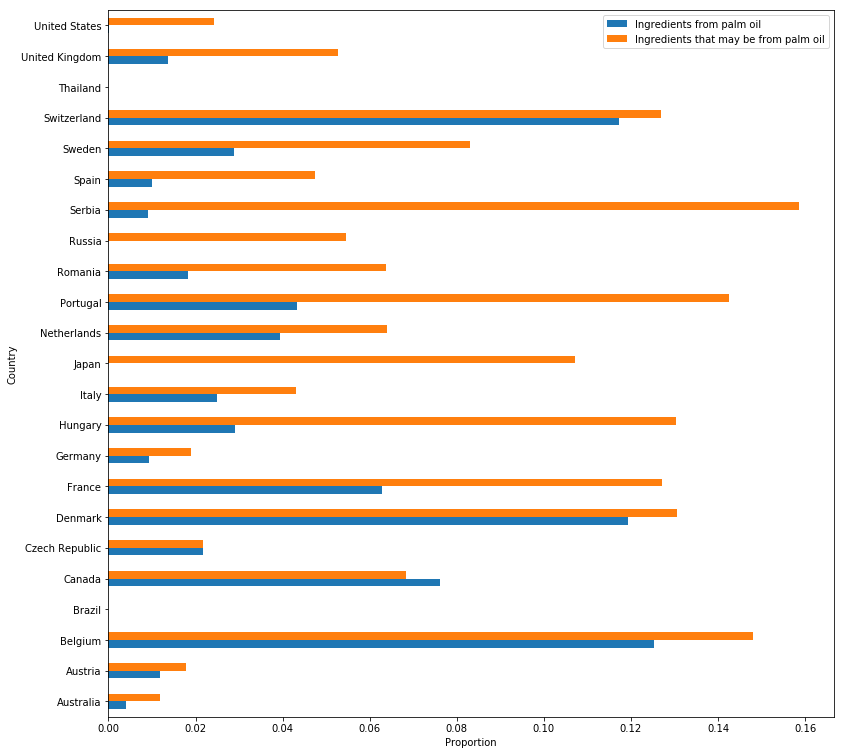

In [17]:
food_countries = del_nulls(food_df, ["countries_en"])
countries = food_countries["countries_en"].value_counts()
df = splitDataFrameList(del_nulls(food_df[["countries_en", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]]), "countries_en", ",")
fig, ax = plt.subplots(figsize=(13,13))
df[df["countries_en"].isin(countries[:30].index)].groupby("countries_en").mean().plot.barh(ax = ax)
ax.set_xlabel("Proportion")
ax.set_ylabel("Country")
ax.legend(["Ingredients from palm oil", "Ingredients that may be from palm oil"])

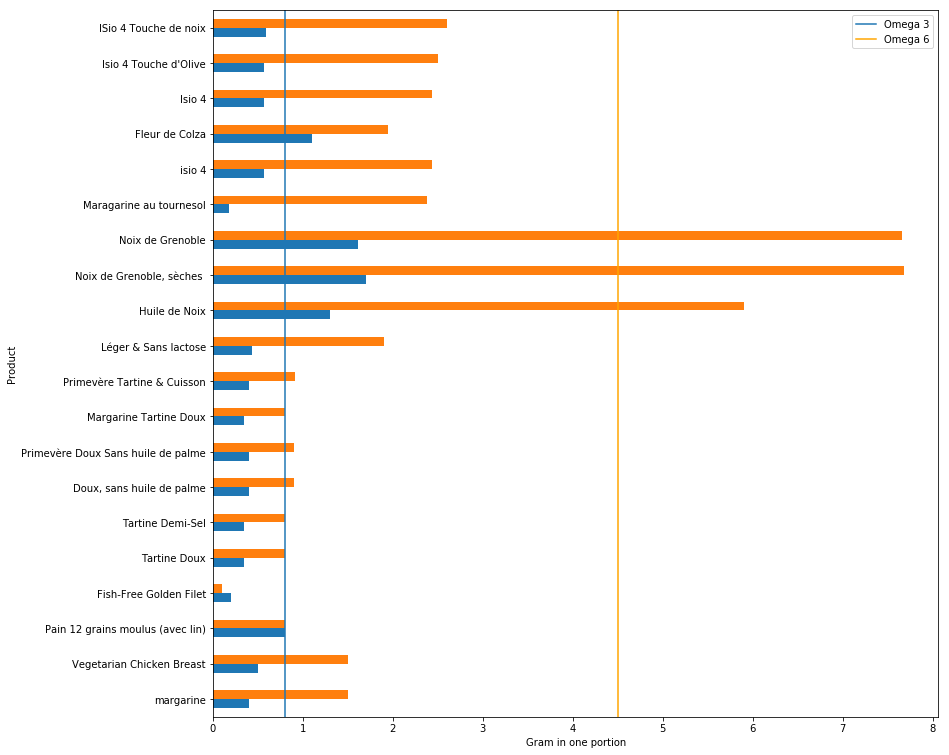

In [10]:
food_df.columns = food_df.columns.str.replace('-','_')
serv_size = food_df.loc[(food_df['main_category'] == 'en:plant-based-foods-and-beverages')]
serv_size = del_nulls(serv_size[["product_name", "omega_3_fat_100g", "omega_6_fat_100g", "serving_size"]])
serv_size = serv_size.loc[serv_size["serving_size"].str.contains(' g')]
serv_size.serving_size = serv_size["serving_size"].str.split(' g').str[0]
serv_size.serving_size = serv_size["serving_size"].str.split(' ').str[-1]
serv_size.serving_size = serv_size["serving_size"].str.replace('(', '')
serv_size.serving_size = serv_size["serving_size"].str.replace(',', '.')
serv_size.serving_size = pd.to_numeric(serv_size["serving_size"], errors='coerce')
serv_size.omega_3_fat_100g = pd.to_numeric(serv_size["omega_3_fat_100g"], errors='coerce')
serv_size['all_omega3'] = serv_size.omega_3_fat_100g * serv_size.serving_size/100
serv_size.omega_6_fat_100g = pd.to_numeric(serv_size["omega_6_fat_100g"], errors='coerce')
serv_size['all_omega6'] = serv_size.omega_6_fat_100g * serv_size.serving_size/100
serv_size.sort_values(by=['all_omega3', 'all_omega6'], ascending=False)
fig, ax = plt.subplots(figsize=(13,13))
serv_size[["product_name", 'all_omega3', 'all_omega6']][:20].plot.barh(x='product_name', ax = ax)
ax.axvline(x=0.8)
ax.axvline(x=4.5, color='orange')
ax.set_xlabel("Gram in one portion")
ax.set_ylabel("Product")
ax.legend(["Omega 3", "Omega 6"])


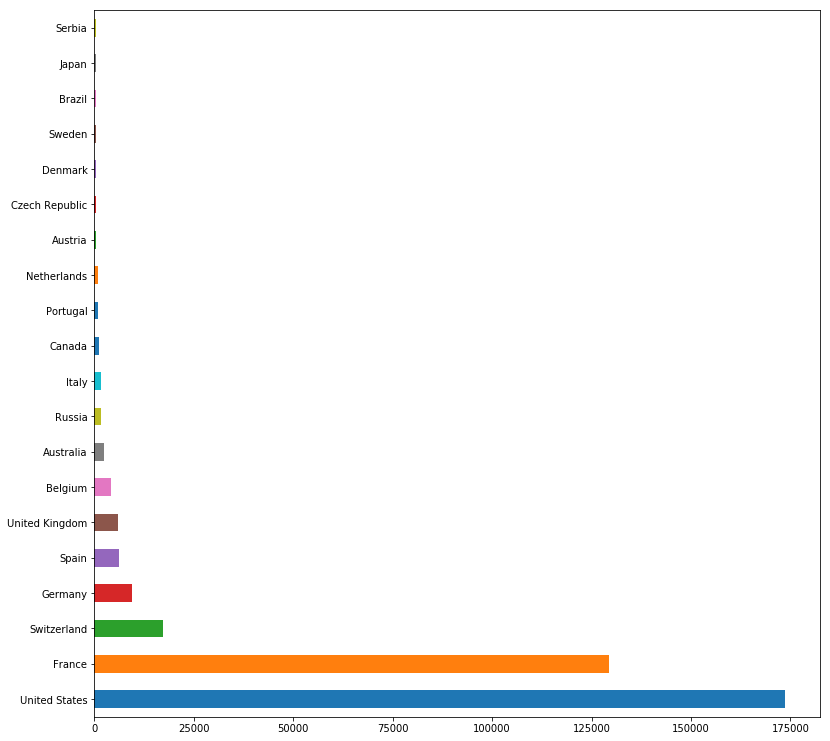

In [16]:
food_countries = splitDataFrameList(del_nulls(food_df, ["countries_en"]), "countries_en", ",")
countries = food_countries["countries_en"].value_counts()
fig, ax = plt.subplots(figsize=(13,13))
ax = countries[:20].plot.barh()